### 1000 imagenes de cada clase en RGB

### Optimizador Adam learning_rate=0.0001

### Epocas = 100

### 3 capas densas = ReLu, ReLu y Softmax

### Ultima capa = Sigmoid

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

import random
     
from keras.layers import Dropout
from keras.layers import Flatten

from tensorflow.keras.layers import Conv2D

from tensorflow.keras.layers import MaxPooling2D
     
from keras.models import Model

import matplotlib.image as mpimg
import seaborn as sns
import cv2

import glob

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix

2024-05-24 17:06:22.184762: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
file_path = 'Desktop/proyecto integrador/*'

In [3]:
#Data acquisition
noise = glob.glob("NOK_1000_RGB/*.png")

nonoise = glob.glob("OK_1000_RGB/*.png")

In [4]:
len(noise)

1000

In [5]:
len(nonoise)

1000

In [6]:
noise_Formated = []
nonoise_Formated = []

width = 400 
height = 250
dim = (width, height)

for i in noise:
    img = mpimg.imread(i)
    #resize image
    img_resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    
    #delete alpha chanel
    if img_resized.shape[2] ==4:
        img_resized = img_resized[:, :, :3]
        
    #add the new image to a new array
    noise_Formated.append(img_resized)

for i in nonoise:
    img = mpimg.imread(i)
    #resize image
    img_resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    
    #delete alpha chanel
    if img_resized.shape[2] ==4:
        img_resized = img_resized[:, :, :3]
        
    #add the new image to a new array
    nonoise_Formated.append(img_resized)

In [7]:
y_noise = np.ones(len(noise_Formated))
y_nonoise = np.zeros(len(nonoise_Formated))

In [8]:
noise_Formated = np.array(noise_Formated)
nonoise_Formated = np.array(nonoise_Formated)

In [9]:
X = np.vstack((noise_Formated,nonoise_Formated))
print("Shape of X before reshaping:", X.shape)

Shape of X before reshaping: (2000, 250, 400, 3)


In [10]:
y = np.hstack((y_noise,y_nonoise))
print("Shape of y before reshaping:", y.shape)

Shape of y before reshaping: (2000,)


In [11]:
X=X/255.0

In [12]:
num_pixels = width * height * 3
X = X.reshape(X.shape[0], num_pixels)
print("Shape of X after reshaping:", X.shape)

Shape of X after reshaping: (2000, 300000)


In [13]:
model = Sequential()
model.add(Dense(units = 50, input_dim=num_pixels, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(units = 20, activation='relu'))
#model.add(Dense(units = 10, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(units = 10, activation='softmax'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │    15,000,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │         1,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,001,280 (57.23 MB)

 Trainable params: 15,001,280 (57.23 MB)

 Non-trainable params: 0 (0.00 B)

None


In [14]:
print(X.shape)
print(y.shape)
print(y)

(2000, 300000)
(2000,)
[1. 1. 1. ... 0. 0. 0.]


In [15]:
# 10% para el set de prueba
X_tv, X_test, y_tv, y_test = train_test_split(X, y, test_size = 0.1, stratify=y, random_state = 42)

In [16]:
# 10% para el set de validacion
X_train, X_val, y_train, y_val = train_test_split(X_tv, y_tv, test_size = 0.1, stratify=y_tv, random_state = 42)

In [17]:
model = Sequential()
model.add(Dense(units=1, input_dim=num_pixels, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy',  metrics=['accuracy'])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
hist = model.fit(x=X_train, y=y_train, verbose=2, batch_size=32, epochs=100, 
                 validation_data=(X_val, y_val), shuffle='true')

Epoch 1/100
51/51 - 6s - 122ms/step - accuracy: 0.6290 - loss: 0.6287 - val_accuracy: 0.7111 - val_loss: 0.5593
Epoch 2/100
51/51 - 2s - 33ms/step - accuracy: 0.7006 - loss: 0.5603 - val_accuracy: 0.7222 - val_loss: 0.5294
Epoch 3/100
51/51 - 1s - 28ms/step - accuracy: 0.7247 - loss: 0.5374 - val_accuracy: 0.7611 - val_loss: 0.5102
Epoch 4/100
51/51 - 1s - 25ms/step - accuracy: 0.7333 - loss: 0.5183 - val_accuracy: 0.7667 - val_loss: 0.4927
Epoch 5/100
51/51 - 1s - 26ms/step - accuracy: 0.7481 - loss: 0.4997 - val_accuracy: 0.7889 - val_loss: 0.4734
Epoch 6/100
51/51 - 1s - 24ms/step - accuracy: 0.7728 - loss: 0.4869 - val_accuracy: 0.7833 - val_loss: 0.4628
Epoch 7/100
51/51 - 1s - 28ms/step - accuracy: 0.7667 - loss: 0.4740 - val_accuracy: 0.7833 - val_loss: 0.4550
Epoch 8/100
51/51 - 1s - 24ms/step - accuracy: 0.7815 - loss: 0.4605 - val_accuracy: 0.8167 - val_loss: 0.4475
Epoch 9/100
51/51 - 1s - 24ms/step - accuracy: 0.7901 - loss: 0.4492 - val_accuracy: 0.8167 - val_loss: 0.4379


Epoch 75/100
51/51 - 1s - 23ms/step - accuracy: 0.9833 - loss: 0.1595 - val_accuracy: 0.9611 - val_loss: 0.1813
Epoch 76/100
51/51 - 1s - 23ms/step - accuracy: 0.9852 - loss: 0.1570 - val_accuracy: 0.9611 - val_loss: 0.1791
Epoch 77/100
51/51 - 1s - 23ms/step - accuracy: 0.9833 - loss: 0.1555 - val_accuracy: 0.9611 - val_loss: 0.1784
Epoch 78/100
51/51 - 1s - 22ms/step - accuracy: 0.9864 - loss: 0.1532 - val_accuracy: 0.9556 - val_loss: 0.1757
Epoch 79/100
51/51 - 1s - 23ms/step - accuracy: 0.9858 - loss: 0.1510 - val_accuracy: 0.9611 - val_loss: 0.1730
Epoch 80/100
51/51 - 1s - 23ms/step - accuracy: 0.9864 - loss: 0.1489 - val_accuracy: 0.9611 - val_loss: 0.1706
Epoch 81/100
51/51 - 1s - 23ms/step - accuracy: 0.9889 - loss: 0.1471 - val_accuracy: 0.9611 - val_loss: 0.1689
Epoch 82/100
51/51 - 1s - 23ms/step - accuracy: 0.9870 - loss: 0.1450 - val_accuracy: 0.9611 - val_loss: 0.1664
Epoch 83/100
51/51 - 1s - 25ms/step - accuracy: 0.9870 - loss: 0.1445 - val_accuracy: 0.9667 - val_loss:

In [19]:
# resumen del model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 1)              │       300,001 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 900,005 (3.43 MB)

 Trainable params: 300,001 (1.14 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 600,004 (2.29 MB)

In [20]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

7/7 - 0s - 16ms/step - accuracy: 0.9600 - loss: 0.1727


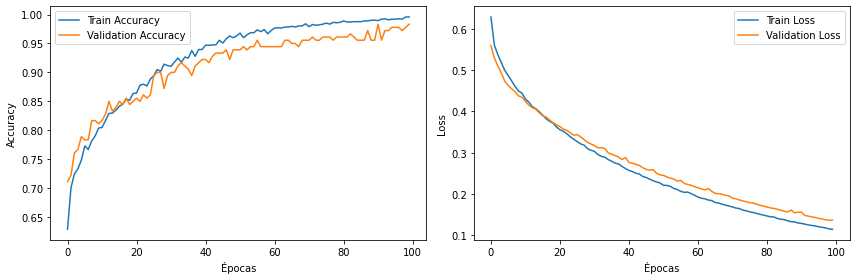

In [21]:
# Obtén los datos del historial
accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']


# Gráfica de accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()

# Gráfica de pérdida
plt.subplot(1, 2, 2)
plt.plot(loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

# Ajusta los márgenes y espacios entre subplots
plt.tight_layout()

# Muestra las gráficas
plt.show()

In [22]:
y_proba_train = model.predict(X_train)
y_pred_train = y_proba_train.round().astype(int)
y_proba_validation = model.predict(X_val)
y_pred_validation = y_proba_validation.round().astype(int)
y_proba_test = model.predict(X_test)
y_pred_test = y_proba_test.round().astype(int)

51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [23]:
lbl = LabelEncoder()
target_names = ['class 0', 'class 1']
#Class 0 = NOK
#Class 1 = OK

In [24]:
!pip install -q scikit-plot
import scikitplot as skplt

In [25]:
print("Train sample \n", classification_report(y_train, y_pred_train,target_names = target_names))
print("Validation sample \n", classification_report(y_val, y_pred_validation,target_names = target_names))
print("Test sample \n", classification_report(y_test, y_pred_test,target_names = target_names))

Train sample 
               precision    recall  f1-score   support

     class 0       1.00      1.00      1.00       810
     class 1       1.00      1.00      1.00       810

    accuracy                           1.00      1620
   macro avg       1.00      1.00      1.00      1620
weighted avg       1.00      1.00      1.00      1620

Validation sample 
               precision    recall  f1-score   support

     class 0       0.98      0.99      0.98        90
     class 1       0.99      0.98      0.98        90

    accuracy                           0.98       180
   macro avg       0.98      0.98      0.98       180
weighted avg       0.98      0.98      0.98       180

Test sample 
               precision    recall  f1-score   support

     class 0       0.97      0.95      0.96       100
     class 1       0.95      0.97      0.96       100

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96  

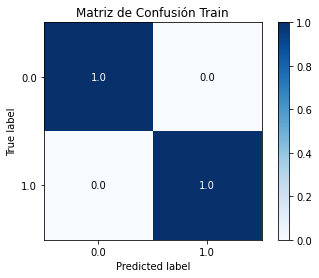

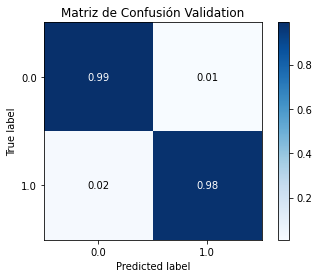

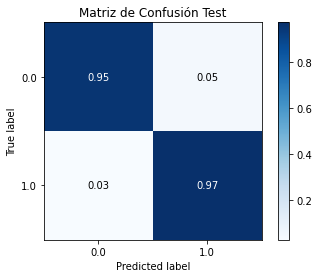

In [26]:
# Gráfico de Matriz de Confusión
skplt.metrics.plot_confusion_matrix(y_train, y_pred_train, normalize=True)
plt.title('Matriz de Confusión Train')

skplt.metrics.plot_confusion_matrix(y_val, y_pred_validation, normalize=True)
plt.title('Matriz de Confusión Validation')

skplt.metrics.plot_confusion_matrix(y_test, y_pred_test, normalize=True)
plt.title('Matriz de Confusión Test')

plt.show() 